In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json


In [2]:

def seconds_from_start_of_day(timestamp):
    # Convert the timestamp to a datetime object
    dt_object = datetime.fromtimestamp(timestamp)

    # Create a new datetime object for the start of the day
    start_of_day = datetime(dt_object.year, dt_object.month, dt_object.day)

    # Calculate the time difference
    time_difference = dt_object - start_of_day

    # Extract the total number of seconds
    seconds = time_difference.total_seconds()

    return seconds

In [3]:
with open("year_data.json", "r") as f:
    year_data = json.load(f)

year_data["1"]["1"]["praying_times"]

{'Midnight': 1672524240.0,
 'Lastthird': 1672532520.0,
 'Imsak': 1672542900.0,
 'Fajr': 1672543500.0,
 'Sunrise': 1672549140.0,
 'Dhuhr': 1672567440.0,
 'Asr': 1672577400.0,
 'Maghrib': 1672585740.0,
 'Isha': 1672590720.0,
 'Firstthird': 1672602300.0}

In [4]:
all_prayes = ["Fajr", "Dhuhr", "Asr", "Maghrib", "Isha"]
all_prayes

['Fajr', 'Dhuhr', 'Asr', 'Maghrib', 'Isha']

In [5]:
day_in_year = 0
all_prayes_times = {key:[] for key in all_prayes}
for month in range(1, 12+1):
    for day in range(1, len(year_data[str(month)]) + 1):
        day_in_year +=1
        for pray in all_prayes:
            pray_time = year_data[str(month)][str(day)]["praying_times"][pray]
            all_prayes_times[pray].append(seconds_from_start_of_day(pray_time))


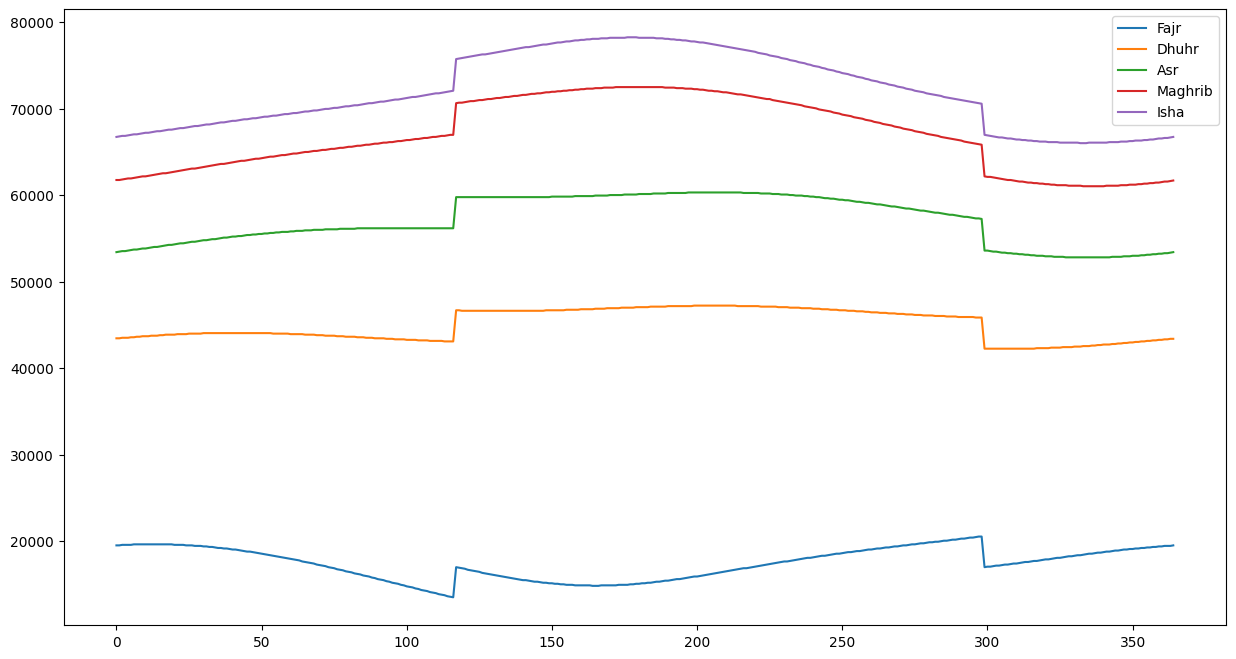

In [9]:
x_axis_range = [i for i in range(day_in_year)]
plt.figure(figsize=(15, 8))
for pray in all_prayes:
    plt.plot(x_axis_range, all_prayes_times[pray], label=f'{pray}')
plt.legend();
